# Assignment 5

In [46]:
library(alr4)
suppressMessages(attach(fuel2001))
names(fuel2001)

[1] "Drivers" "FuelC"   "Income"  "Miles"   "MPC"     "Pop"     "Tax"

### Problem 7.8

### Problem 7.10

In [19]:
Dlic <- 1000*Drivers/Pop
Fuel <- 1000*FuelC/Pop
Income <- Income/1000
lm <- lm(Fuel~Tax+Dlic+Income+log(Miles))
confint(lm)

,2.5 %,97.5 %
(Intercept),-2.381329e+02,5.465186e+02
Tax,-8.314405e+00,-1.415614e-01
Dlic,2.131871e-01,7.305553e-01
Income,-1.055089e+07,-1.719776e+06
log(Miles),7.960016e+00,4.555033e+01


In [23]:
betahat.boot<-bootCase(lm,B=999)
betahat.boot[1:4,]

(Intercept),Tax,Dlic,Income,log(Miles)
125.3756,-5.181328,0.5471783,-7046265,27.764173
110.3067,-4.532087,0.5047085,-5428451,28.479402
272.8402,-8.151827,0.6522418,-5091796,6.298206
374.8888,-2.099676,0.2633339,-7930801,24.160110


In [24]:
cl <- function(x) quantile(x,c(.025,.975))
apply(betahat.boot,2,cl)

,(Intercept),Tax,Dlic,Income,log(Miles)
2.5%,-148.9217,-10.4121519,0.1315458,-9682679,-5.474201
97.5%,784.2706,0.2634502,0.8008077,-2730973,46.642079


### Problem 8.1

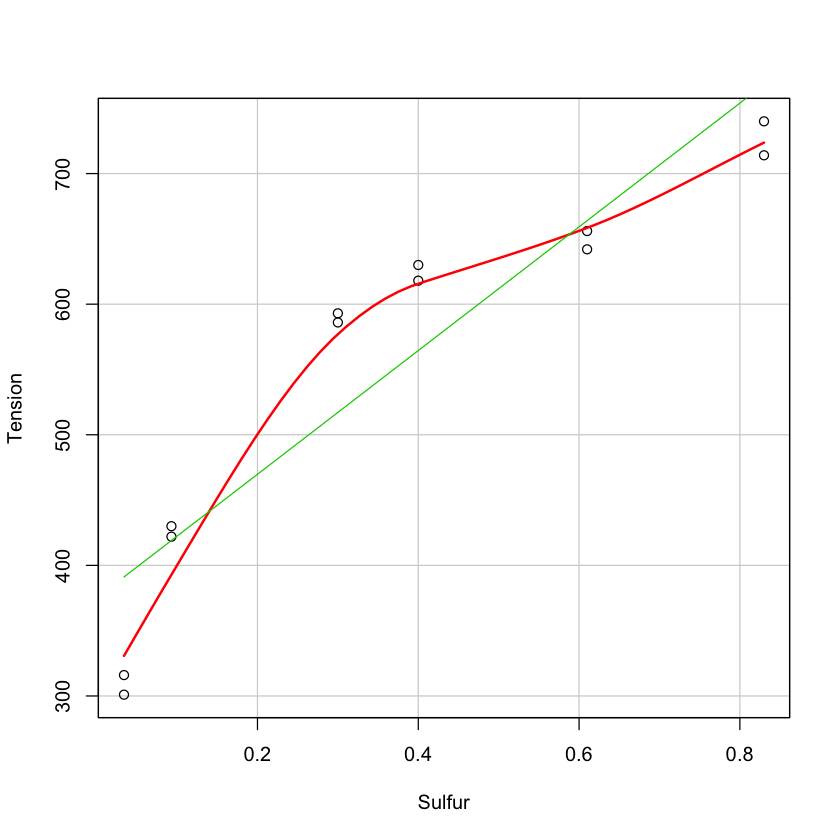

In [36]:
library(alr3)
suppressMessages(attach(baeskel))
model <- lm(Tension~Sulfur)
scatterplot(Tension~Sulfur,smooth=TRUE,boxplots=FALSE,spread=FALSE)

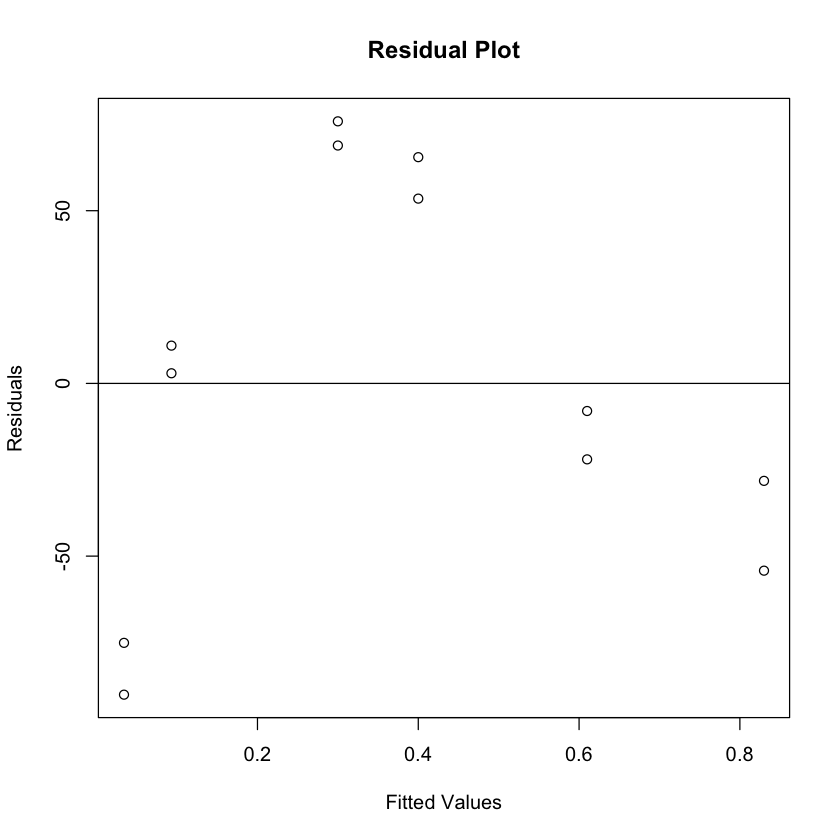

In [37]:
plot(resid(model)~Sulfur,ylab="Residuals",xlab="Fitted Values",main="Residual Plot")
abline(0,0)

ERROR: Error in formula.default(object, env = baseenv()): invalid formula


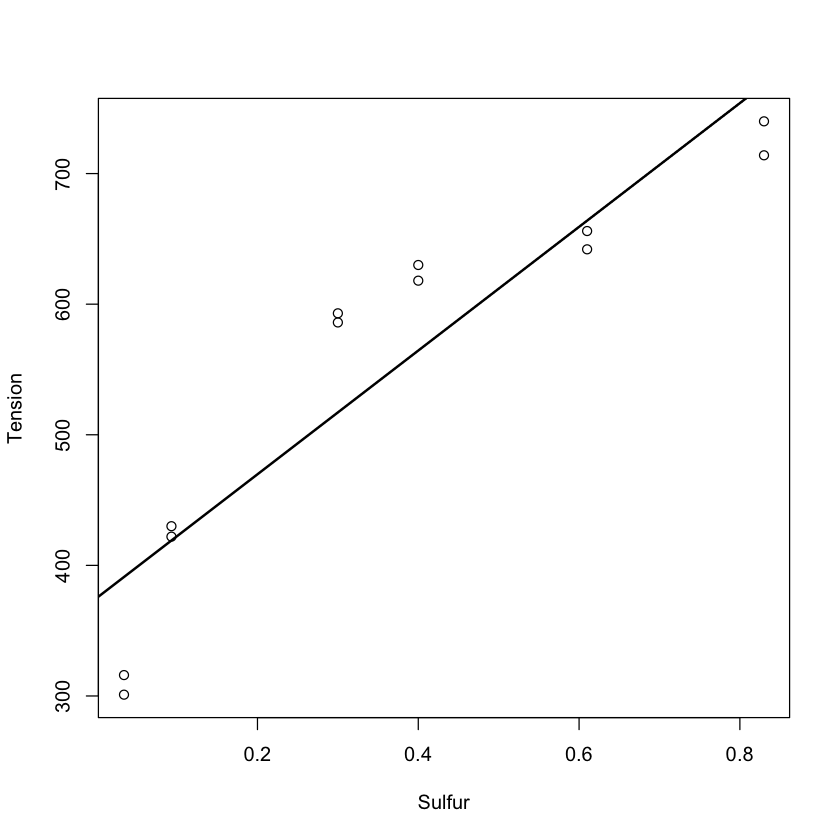

In [43]:
plot(Tension~Sulfur)
abline(model,lwd=2)
sequence <- with(baeskel, seq(min(Sulfur),max(Sulfur),length=100))
model2 <- update(model, log(Sulfur))
with(baeskel, lines(sequence, predict(model2, data.frame(Sulfur=new)), lwd=1.5,lty=2))
model3 <- update(model2, log(Sulfur))
with(baeskel, lines(sequence, predict(model3, data.frame(Sulfur=new)), lwd=2, lty=3))

In [44]:
suppressMessages(attach(jevons))
par(mfrow=c(1,2))